In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt as pyp
import seaborn as sns
import datetime
import yfinance as yf
idx = pd.IndexSlice

from pypfopt.black_litterman import BlackLittermanModel
from pypfopt import black_litterman, risk_models

In [127]:
data = pd.read_csv('market prices.csv',index_col = 0)
market_cap = pd.read_csv('mcap.csv')

market_prices = pd.DataFrame(data)
mcap = pd.DataFrame(market_cap)

mcap.head()

,Tickers,Market Cap
0,医药生物,20492
1,电子,18290
2,银行,25943
3,食品饮料,15468
4,计算机,11907


In [128]:
#create market cap dict
mcap_dict = {ticker[:] : cap for ticker, cap in zip(mcap['Tickers'].values, mcap['Market Cap'].values)}
print(mcap_dict)

{'医药生物': 20492, '电子': 18290, '银行': 25943, '食品饮料': 15468, '计算机': 11907, '房地产': 11038, '传媒': 8205, '家用电器': 7948, '电气设备': 8448, '汽车': 6812}


In [129]:
sample_cov = pyp.risk_models.sample_cov(market_prices, returns_data=False, frequency=252, log_returns=False)
print(sample_cov)

          医药生物        电子        银行      食品饮料       计算机       房地产        传媒  \
医药生物  0.050924  0.050241  0.018146  0.043505  0.053381  0.035425  0.044975   
电子    0.050241  0.094725  0.022412  0.044142  0.090021  0.041912  0.066369   
银行    0.018146  0.022412  0.030207  0.022931  0.022169  0.025644  0.019619   
食品饮料  0.043505  0.044142  0.022931  0.068120  0.039197  0.034490  0.034046   
计算机   0.053381  0.090021  0.022169  0.039197  0.116315  0.047211  0.076649   
房地产   0.035425  0.041912  0.025644  0.034490  0.047211  0.050827  0.042104   
传媒    0.044975  0.066369  0.019619  0.034046  0.076649  0.042104  0.075479   
家用电器  0.041855  0.048374  0.026693  0.044260  0.051083  0.042412  0.040846   
电气设备  0.039712  0.061900  0.019600  0.033343  0.069028  0.039635  0.053652   
汽车    0.040663  0.054501  0.022140  0.035903  0.058657  0.039042  0.046238   

          家用电器      电气设备        汽车  
医药生物  0.041855  0.039712  0.040663  
电子    0.048374  0.061900  0.054501  
银行    0.026693  0.019600  0.02

In [130]:
#风险厌恶 delta
prices = pd.read_csv('中证500.csv')
prices = pd.DataFrame(prices)
prices['prices'] = prices['prices'].astype(float)
prices['date'] = pd.to_datetime(prices['date'])
prices.set_index('date', inplace=True)
prices

,prices
date,
2019-01-02,4131.9567
2019-01-03,4112.8070
2019-01-04,4210.8786
2019-01-07,4288.3234
2019-01-08,4277.2967
...,...
2019-12-25,5183.0986
2019-12-26,5219.1404
2019-12-27,5179.1929


In [131]:
S = pyp.risk_models.CovarianceShrinkage(market_prices).ledoit_wolf()
print(S)

          医药生物        电子        银行      食品饮料       计算机       房地产        传媒  \
医药生物  0.051225  0.048440  0.017495  0.041945  0.051468  0.034155  0.043363   
电子    0.048440  0.093456  0.021608  0.042559  0.086794  0.040409  0.063990   
银行    0.017495  0.021608  0.031251  0.022109  0.021374  0.024724  0.018916   
食品饮料  0.041945  0.042559  0.022109  0.067804  0.037792  0.033253  0.032825   
计算机   0.051468  0.086794  0.021374  0.037792  0.114272  0.045519  0.073901   
房地产   0.034155  0.040409  0.024724  0.033253  0.045519  0.051131  0.040595   
传媒    0.043363  0.063990  0.018916  0.032825  0.073901  0.040595  0.074900   
家用电器  0.040354  0.046640  0.025736  0.042673  0.049252  0.040891  0.039382   
电气设备  0.038288  0.059681  0.018898  0.032148  0.066554  0.038214  0.051729   
汽车    0.039205  0.052547  0.021346  0.034616  0.056554  0.037642  0.044581   

          家用电器      电气设备        汽车  
医药生物  0.040354  0.038288  0.039205  
电子    0.046640  0.059681  0.052547  
银行    0.025736  0.018898  0.02

In [132]:
delta = pyp.black_litterman.market_implied_risk_aversion(prices,risk_free_rate=0.05)
print(delta)

prices    4.183981
dtype: float64


In [137]:
market_prior = black_litterman.market_implied_prior_returns(mcap_dict, delta,S)
market_prior.name = 'Prior'
print(market_prior)

prices   NaN
传媒       NaN
医药生物     NaN
家用电器     NaN
房地产      NaN
汽车       NaN
电子       NaN
电气设备     NaN
计算机      NaN
银行       NaN
食品饮料     NaN
Name: Prior, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30005 missing from c

Text(0.5, 1.0, 'Assets Correlation Matrix')

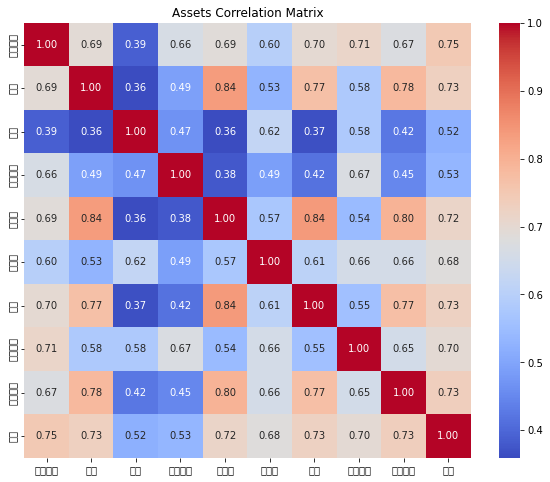

In [134]:
#heatmap of mcaps

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(market_prices.pct_change().corr(method ='spearman'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
ax.set_title('Assets Correlation Matrix')


In [135]:
P = np.array([[0,0,0,0,0,0,0,0,0,1],
            [0,0,0,0,0,0,1,0,0,0],
            [0,0,0,1,0,0,0,-1,0,0],
            [0,0.5,-0.7,0,0.3,-0.3,0,0,0.2,0],
            ])
Q = np.array([0.06,0.04,-0.01,0.02]).reshape(-1,1)

In [138]:
BlackLittermanModel(S,pi=market_prior, absolute_views=None,Q = Q,P=P,omega=None,view_confidences=None,tau=0.05,risk_aversion=delta.all()) 


AssertionError: pi must have dimensions Nx1